<a href="https://colab.research.google.com/github/pravin-raut/MachineLearning/blob/Master/dissertation/01_Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!pip install quandl
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
import yfinance as yf
import pandas as pd
from datetime import datetime,timedelta
import quandl
import json

In [77]:
# Open the file for reading and load the data from it
with open("/content/drive/MyDrive/Configuration/Config.json", "r") as infile:
  data = json.load(infile)
# Set up API key
  api_key=data["nasdaq"]["api_key"]
quandl.ApiConfig.api_key = api_key


In [78]:
CurrentDate = (datetime.today() - timedelta(days=2)).strftime('%Y-%m-%d')
CurrentDate

'2023-06-13'

In [79]:
DayBefore1000 = (datetime.today() - timedelta(days=2000)).strftime('%Y-%m-%d')
DayBefore1000


'2017-12-23'

In [80]:
def getDataFromAPI(API,symbol,start_date,end_date):

  if API=="YFinance":
    # Create a ticker object
    ticker = yf.Ticker(symbol)
    # Download historical data
    data = ticker.history(period="1d", start=start_date, end=end_date)

  if API=="Nasdaq":
    data = quandl.get(symbol,start_date=start_date,end_date=end_date)


  return data

In [81]:
OilPriceInUSD=getDataFromAPI("Nasdaq","OPEC/ORB",DayBefore1000,CurrentDate).reset_index()
OilPriceInUSD['Date'] = pd.to_datetime(OilPriceInUSD['Date']).dt.date
OilPriceInUSD.set_index('Date', inplace=True)
OilPriceInUSD

,Value
Date,
2017-12-26,63.07
2017-12-27,64.24
2017-12-28,64.17
2017-12-29,64.47
2018-01-02,64.84
...,...
2023-06-07,76.03
2023-06-08,76.55
2023-06-09,75.85


In [82]:
EuroPriceInUSD=getDataFromAPI("YFinance","EURUSD=X",DayBefore1000,CurrentDate).reset_index()
EuroPriceInUSD['Date'] = pd.to_datetime(EuroPriceInUSD['Date']).dt.date
EuroPriceInUSD.set_index('Date', inplace=True)
EuroPriceInUSD

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-25,1.185677,1.188495,1.184904,1.185607,0,0.0,0.0
2017-12-26,1.187127,1.187790,1.184750,1.187254,0,0.0,0.0
2017-12-27,1.186099,1.191043,1.185565,1.185789,0,0.0,0.0
2017-12-28,1.190023,1.195500,1.189825,1.190079,0,0.0,0.0
2017-12-29,1.193987,1.202284,1.193802,1.194172,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-06,1.071180,1.073307,1.066735,1.071180,0,0.0,0.0
2023-06-07,1.069805,1.074022,1.066883,1.069805,0,0.0,0.0
2023-06-08,1.070744,1.078283,1.070217,1.070744,0,0.0,0.0


In [83]:
data=EuroPriceInUSD.merge(OilPriceInUSD, on='Date', how='inner').reset_index()
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value
0,2017-12-26,1.187127,1.187790,1.184750,1.187254,0,0.0,0.0,63.07
1,2017-12-27,1.186099,1.191043,1.185565,1.185789,0,0.0,0.0,64.24
2,2017-12-28,1.190023,1.195500,1.189825,1.190079,0,0.0,0.0,64.17
3,2017-12-29,1.193987,1.202284,1.193802,1.194172,0,0.0,0.0,64.47
4,2018-01-02,1.201086,1.208094,1.200855,1.201158,0,0.0,0.0,64.84
...,...,...,...,...,...,...,...,...,...
1401,2023-06-06,1.071180,1.073307,1.066735,1.071180,0,0.0,0.0,75.46
1402,2023-06-07,1.069805,1.074022,1.066883,1.069805,0,0.0,0.0,76.03
1403,2023-06-08,1.070744,1.078283,1.070217,1.070744,0,0.0,0.0,76.55
1404,2023-06-09,1.078272,1.078749,1.074772,1.078272,0,0.0,0.0,75.85


In [84]:
selected_data = data[['Date', 'Close', 'Value']]
selected_data = selected_data.rename(columns={'Close': 'USD_EUR_Price', 'Value': 'Oil_Price'})
selected_data['Date'] = pd.to_datetime(selected_data['Date'])
selected_data.set_index('Date', inplace=True)
selected_data

,USD_EUR_Price,Oil_Price
Date,,
2017-12-26,1.187254,63.07
2017-12-27,1.185789,64.24
2017-12-28,1.190079,64.17
2017-12-29,1.194172,64.47
2018-01-02,1.201158,64.84
...,...,...
2023-06-06,1.071180,75.46
2023-06-07,1.069805,76.03
2023-06-08,1.070744,76.55


In [85]:
selected_data['USD_EUR_Price'].describe()


count    1406.000000
mean        1.131578
std         0.059949
min         0.959619
25%         1.096395
50%         1.131615
75%         1.177912
max         1.251001
Name: USD_EUR_Price, dtype: float64

In [86]:
selected_data['Oil_Price'].describe()


count    1406.000000
mean       69.907319
std        20.259065
min        12.220000
25%        60.660000
50%        69.385000
75%        79.960000
max       128.270000
Name: Oil_Price, dtype: float64

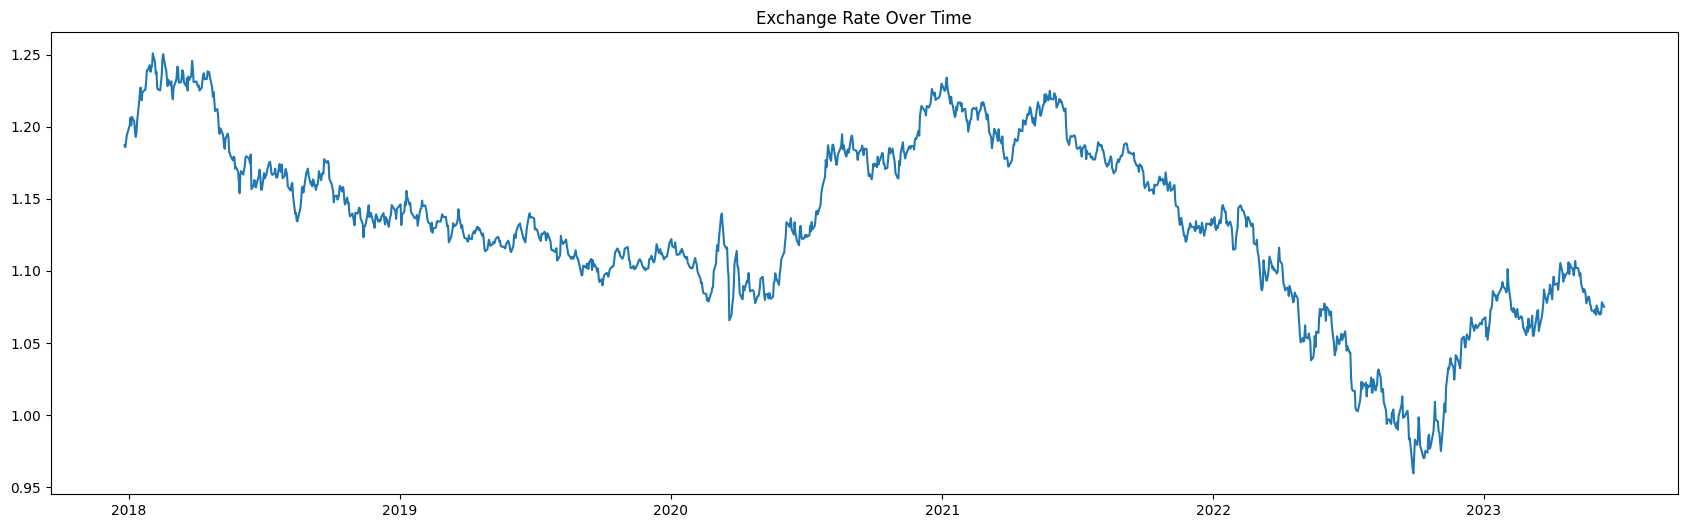

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21, 6))
plt.plot(selected_data.index, selected_data['USD_EUR_Price'])
plt.title('Exchange Rate Over Time')
plt.show()


In [88]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(selected_data['USD_EUR_Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.593305
p-value: 0.486956


In [89]:
selected_data['USD_EUR_Price_diff'] = selected_data['USD_EUR_Price']-selected_data['USD_EUR_Price'].shift(1)
selected_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff
Date,,,
2017-12-26,1.187254,63.07,NaN
2017-12-27,1.185789,64.24,-0.001464
2017-12-28,1.190079,64.17,0.004290
2017-12-29,1.194172,64.47,0.004093
2018-01-02,1.201158,64.84,0.006986
...,...,...,...
2023-06-06,1.071180,75.46,0.001318
2023-06-07,1.069805,76.03,-0.001375
2023-06-08,1.070744,76.55,0.000939


In [90]:
result = adfuller(selected_data['USD_EUR_Price_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -36.305290
p-value: 0.000000


In [127]:
selected_data['USD_EUR_Price_diff1'] = selected_data['USD_EUR_Price'].diff()
selected_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff,USD_EUR_Price_log,USD_EUR_Price_ma,USD_EUR_Price_log2,USD_EUR_Price_diff1
Date,,,,,,,
2017-12-26,1.187254,63.07,NaN,0.171643,NaN,-1.762339,NaN
2017-12-27,1.185789,64.24,-0.001464,0.170409,NaN,-1.769555,-0.001464
2017-12-28,1.190079,64.17,0.004290,0.174020,NaN,-1.748585,0.004290
2017-12-29,1.194172,64.47,0.004093,0.177453,NaN,-1.729047,0.004093
2018-01-02,1.201158,64.84,0.006986,0.183286,NaN,-1.696707,0.006986
...,...,...,...,...,...,...,...
2023-06-06,1.071180,75.46,0.001318,0.068761,-0.015945,-2.677123,0.001318
2023-06-07,1.069805,76.03,-0.001375,0.067476,-0.016386,-2.695980,-0.001375
2023-06-08,1.070744,76.55,0.000939,0.068354,-0.014314,-2.683059,0.000939


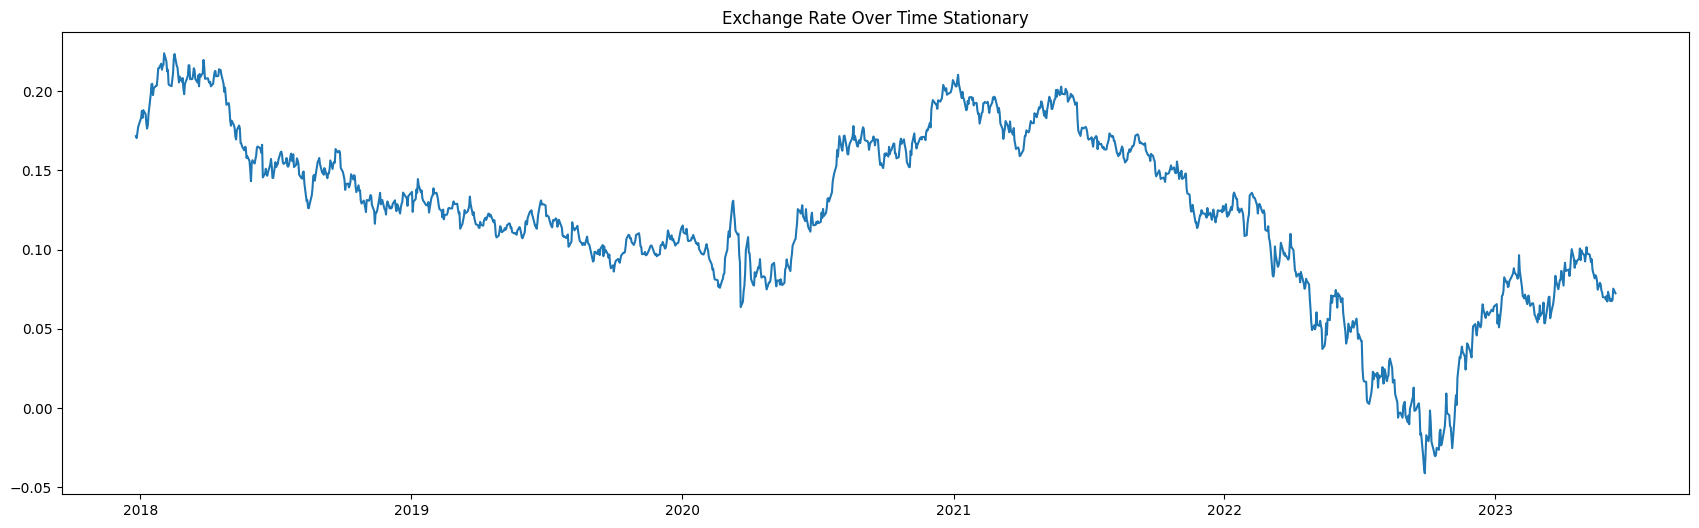

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21, 6))
plt.plot(selected_data.index, selected_data['USD_EUR_Price_log'])
plt.title('Exchange Rate Over Time Stationary')
plt.show()


In [92]:
# Assuming 'selected_data' is a DataFrame containing the 'USD_EUR_Price' column
# Perform an 80-20 split for training and testing
train_data_size = int(0.8 * len(selected_data))
train_data = selected_data.iloc[:train_data_size]
test_data = selected_data.iloc[train_data_size:]

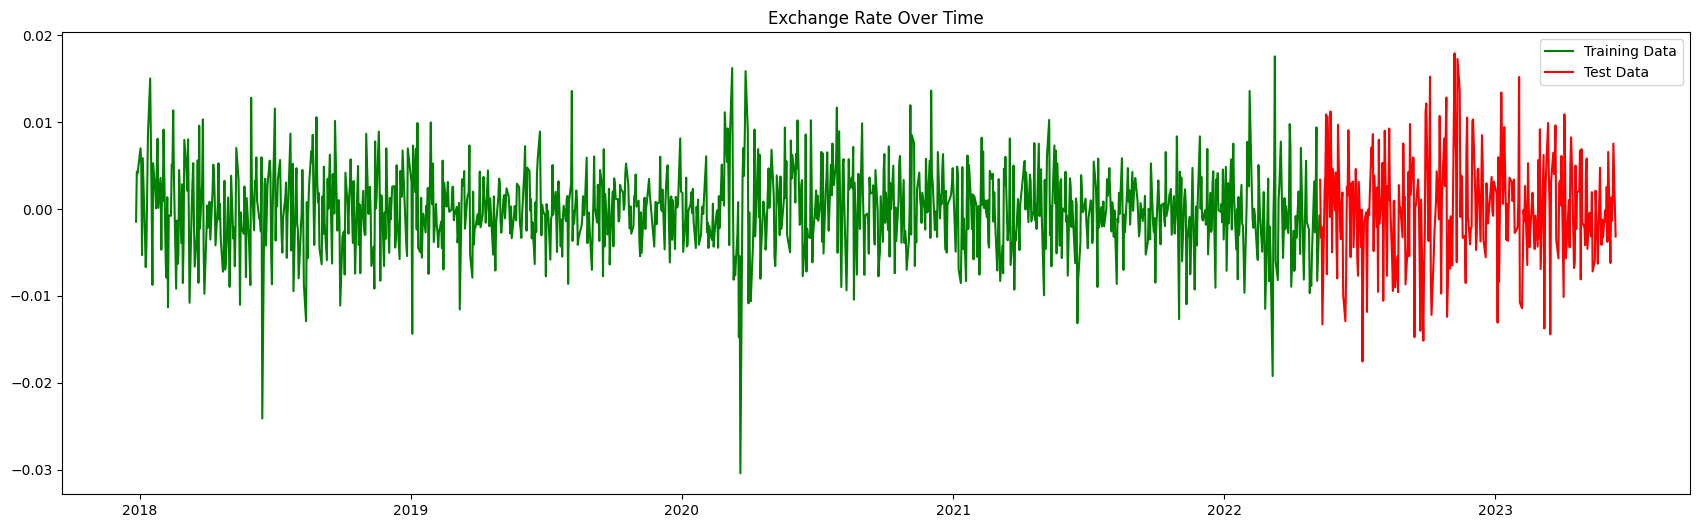

In [93]:
import matplotlib.pyplot as plt

# Plotting the entire data
plt.figure(figsize=(21, 6))

# Plotting the training data
plt.plot(train_data.index, train_data['USD_EUR_Price_diff'], color='green', label='Training Data')

# Plotting the test data
plt.plot(test_data.index, test_data['USD_EUR_Price_diff'], color='red', label='Test Data')

plt.title('Exchange Rate Over Time')
plt.legend()
plt.show()


In [94]:
print('Training data shape: ', train_data.shape)
print('Test data shape: ', test_data.shape)

Training data shape:  (1124, 3)
Test data shape:  (282, 3)


In [95]:
selected_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff
Date,,,
2017-12-26,1.187254,63.07,NaN
2017-12-27,1.185789,64.24,-0.001464
2017-12-28,1.190079,64.17,0.004290
2017-12-29,1.194172,64.47,0.004093
2018-01-02,1.201158,64.84,0.006986
...,...,...,...
2023-06-06,1.071180,75.46,0.001318
2023-06-07,1.069805,76.03,-0.001375
2023-06-08,1.070744,76.55,0.000939


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


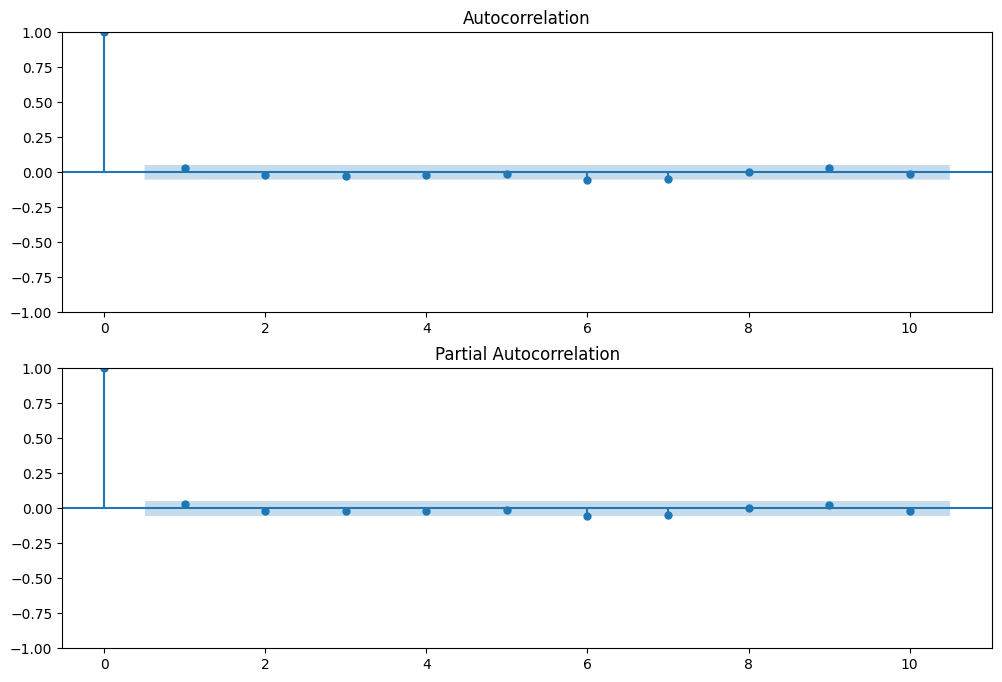

In [96]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot the ACF of the differenced series
plot_acf(selected_data['USD_EUR_Price_diff'].dropna(),lags=10 ,ax=ax1)

# Plot the PACF of the differenced series
plot_pacf(selected_data['USD_EUR_Price_diff'].dropna(),lags=10, ax=ax2)

plt.show()


In [97]:
train_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff
Date,,,
2017-12-26,1.187254,63.07,NaN
2017-12-27,1.185789,64.24,-0.001464
2017-12-28,1.190079,64.17,0.004290
2017-12-29,1.194172,64.47,0.004093
2018-01-02,1.201158,64.84,0.006986
...,...,...,...
2022-05-03,1.050906,109.70,-0.002691
2022-05-04,1.052853,110.73,0.001947
2022-05-05,1.062248,112.94,0.009395


In [98]:
from statsmodels.tsa.arima.model import ARIMA


In [131]:

model=ARIMA(train_data['USD_EUR_Price'],order=(6,0,6))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [132]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          USD_EUR_Price   No. Observations:                 1124
Model:                 ARIMA(6, 0, 6)   Log Likelihood                4412.165
Date:                Thu, 15 Jun 2023   AIC                          -8796.329
Time:                        11:58:04   BIC                          -8725.984
Sample:                             0   HQIC                         -8769.745
                               - 1124                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9566      0.155      6.176      0.000       0.653       1.260
ar.L1         -0.8930      1.263     -0.707      0.480      -3.369       1.583
ar.L2         -0.5190      0.626     -0.828      0.407      -1.747       0.709
ar.L3          0.2238      0.316      0.709      0.478      -0.395       0.842
ar.L4          0.8004      0.443      1.806      0.071      -0.068       1.669
ar.L5          0.8675      0.912      0.951      0.341      -0.920       2.655
ar.L6          0.5116      0.651      0.786      0.432      -0.763       1.787
ma.L1          1.9569      1.264      1.548      0.122      -0.521       4.435
ma.L2          2.5420      1.765      1.440      0.150      -0.917       6.001
ma.L3          2.3823      1.930      1.234      0.217      -1.401       6.166
ma.L4          1.5662      1.641      0.954      0.340      -1.651       4.783
ma.L5          0.6392      0.766      0.834      0.404      -0.862       2.141
ma.L6          0.0394      0.084      0.470      0.638      -0.125       0.203
sigma2       2.27e-05   7.39e-07     30.712      0.000    2.13e-05    2.41e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):               232.04
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.27
Prob(H) (two-sided):                  0.17   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [133]:
import numpy as np

predictions = model_fit.forecast(steps=len(test_data),alpha=0.95)
predictions

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1124    1.053032
1125    1.052598
1126    1.052861
1127    1.052550
1128    1.052741
          ...   
1401    1.031207
1402    1.031138
1403    1.031069
1404    1.031001
1405    1.030932
Name: predicted_mean, Length: 282, dtype: float64

In [103]:
test_data.index

DatetimeIndex(['2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13',
               '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
               '2022-05-20', '2022-05-23',
               ...
               '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02',
               '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-12'],
              dtype='datetime64[ns]', name='Date', length=282, freq=None)

In [134]:
test_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff
Date,,,
2022-05-10,1.056580,108.08,0.003361
2022-05-11,1.053297,108.92,-0.003283
2022-05-12,1.051248,109.20,-0.002048
2022-05-13,1.037958,112.27,-0.013290
2022-05-16,1.040063,112.98,0.002105
...,...,...,...
2023-06-06,1.071180,75.46,0.001318
2023-06-07,1.069805,76.03,-0.001375
2023-06-08,1.070744,76.55,0.000939


In [135]:
predictions = model_fit.forecast(steps=len(test_data))
predictions

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1124    1.053032
1125    1.052598
1126    1.052861
1127    1.052550
1128    1.052741
          ...   
1401    1.031207
1402    1.031138
1403    1.031069
1404    1.031001
1405    1.030932
Name: predicted_mean, Length: 282, dtype: float64

In [109]:
import numpy as np

predictions = model_fit.forecast(steps=len(test_data))

# Reversing the differencing to obtain actual values
predicted_diff = predictions  # Assuming predictions are in the differenced form

# Cumulative sum to reverse the differencing
predicted_values = np.cumsum(predicted_diff)

# Adding the last known value from the training set to the predicted values
last_training_value = train_data['USD_EUR_Price'].iloc[-1]
predicted_values = last_training_value + predicted_values
predicted_values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1124    1.052114
1125    1.050996
1126    1.049877
1127    1.048758
1128    1.047639
          ...   
1401    0.742190
1402    0.741071
1403    0.739952
1404    0.738834
1405    0.737715
Name: predicted_mean, Length: 282, dtype: float64

In [139]:
# Create a DataFrame for predicted values with a date column
predicted_df = pd.DataFrame({'Date': test_data.index, 'Predicted_Value': predictions})
predicted_df.set_index('Date', inplace=True)
predicted_df

,Predicted_Value
Date,
2022-05-10,1.053032
2022-05-11,1.052598
2022-05-12,1.052861
2022-05-13,1.052550
2022-05-16,1.052741
...,...
2023-06-06,1.031207
2023-06-07,1.031138
2023-06-08,1.031069


In [106]:
pd.set_option('display.max_rows', 20)


In [140]:
# Merge the predicted DataFrame with the test data
combined_data = test_data.merge(predicted_df, left_index=True, right_index=True)
combined_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff,Predicted_Value
Date,,,,
2022-05-10,1.056580,108.08,0.003361,1.053032
2022-05-11,1.053297,108.92,-0.003283,1.052598
2022-05-12,1.051248,109.20,-0.002048,1.052861
2022-05-13,1.037958,112.27,-0.013290,1.052550
2022-05-16,1.040063,112.98,0.002105,1.052741
...,...,...,...,...
2023-06-06,1.071180,75.46,0.001318,1.031207
2023-06-07,1.069805,76.03,-0.001375,1.031138
2023-06-08,1.070744,76.55,0.000939,1.031069


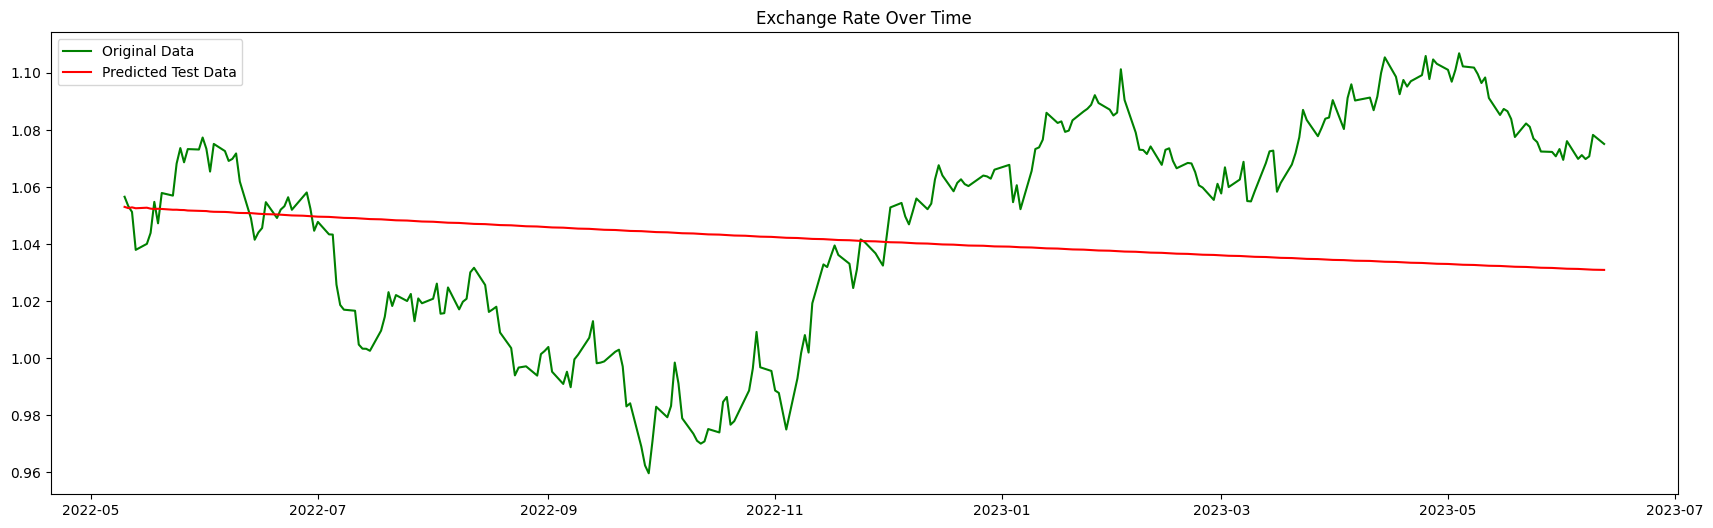

In [141]:
import matplotlib.pyplot as plt

# Plotting the entire data
plt.figure(figsize=(21, 6))

# Plotting the training data
plt.plot(combined_data.index, combined_data['USD_EUR_Price'], color='green', label='Original Data')

# Plotting the test data
plt.plot(combined_data.index, combined_data['Predicted_Value'], color='red', label='Predicted Test Data')

plt.title('Exchange Rate Over Time')
plt.legend()
plt.show()
